In [5]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [6]:
results_file = 'lifetimeandLBICdata.mat'

results = scipy.io.loadmat(results_file)

In [7]:

print(list(results.keys()))


['__header__', '__version__', '__globals__', 'Lifetime', 'Current984nm', 'Reflectivity984nm', 'IQE984nm', 'Current656nm', 'Reflectivity656nm', 'IQE656nm']


In [8]:

lifetime_data = results['Lifetime']
print(f"The 'Lifetime' data has a shape of: {lifetime_data.shape}")

The 'Lifetime' data has a shape of: (571, 570)


In [9]:
x = np.linspace(0, 156, 571)
y = np.linspace(0, 156, 570)
iqe_984nm = results['IQE984nm']
iqe_656nm = results['IQE656nm']
iqe_difference = iqe_656nm - iqe_984nm

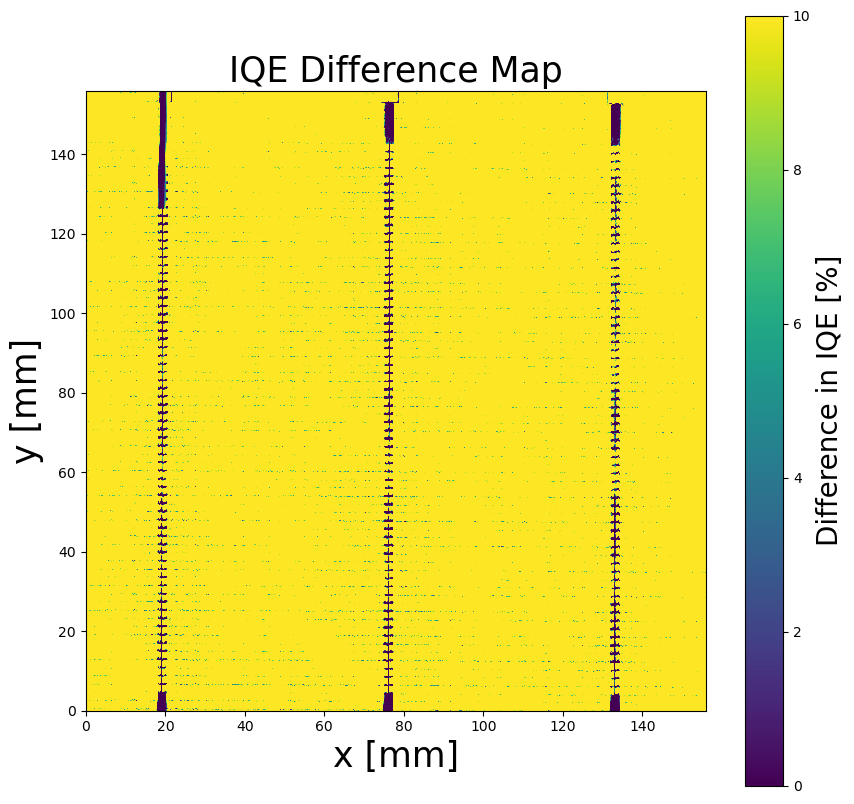

In [30]:
fig, ax = plt.subplots(figsize=(10, 10)) 

im = ax.imshow(100*iqe_difference, extent=[x[0], x[-1], y[0], y[-1]], origin='lower', 
               vmin=0, vmax=10) 

ax.set_title('IQE Difference Map',fontsize=25)
ax.set_xlabel('x [mm]',fontsize=25)
ax.set_ylabel('y [mm]',fontsize=25)
cbar = fig.colorbar(im)
cbar.set_label('Difference in IQE [%]',fontsize=20)
plt.show()

In [112]:
mean_diff = np.mean(iqe_difference)
std_diff = np.std(iqe_difference)
num_std_devs = 1
vmin_stat = 100 * (mean_diff - num_std_devs * std_diff)
vmax_stat = 100 * (mean_diff + num_std_devs * std_diff)
print(f"Mean difference: {100*mean_diff:.2f}%")
print(f"Standard deviation: {100*std_diff:.2f}%")
print(f"Setting color limits to: [{vmin_stat:.2f}, {vmax_stat:.2f}]")

Mean difference: 18.68%
Standard deviation: 8.27%
Setting color limits to: [10.41, 26.94]


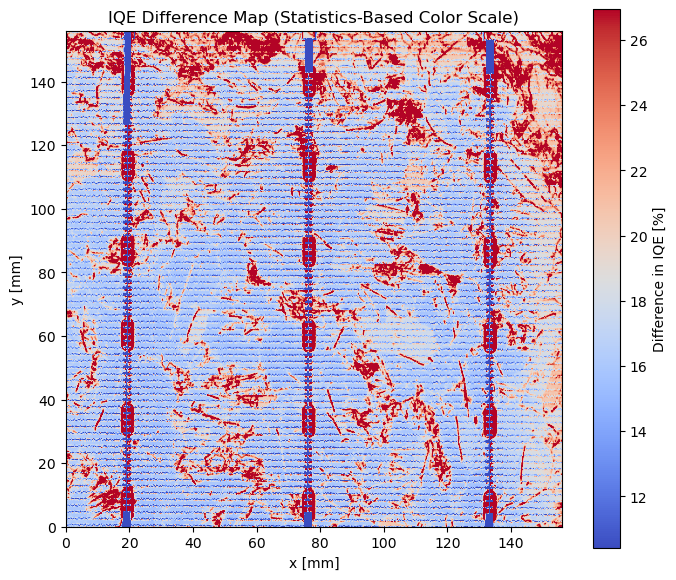

In [113]:
fig, ax = plt.subplots(figsize=(8, 7))

im = ax.imshow(100 * iqe_difference, extent=[x[0], x[-1], y[0], y[-1]], origin='lower',
               cmap='coolwarm',
               vmin=vmin_stat,  # Use the calculated vmin
               vmax=vmax_stat) # Use the calculated vmax

ax.set_title('IQE Difference Map (Statistics-Based Color Scale)')
ax.set_xlabel('x [mm]')
ax.set_ylabel('y [mm]')
cbar = fig.colorbar(im)
cbar.set_label('Difference in IQE [%]')
plt.show()

In [91]:
print(np.min(iqe_difference))

-1.2741114449744975


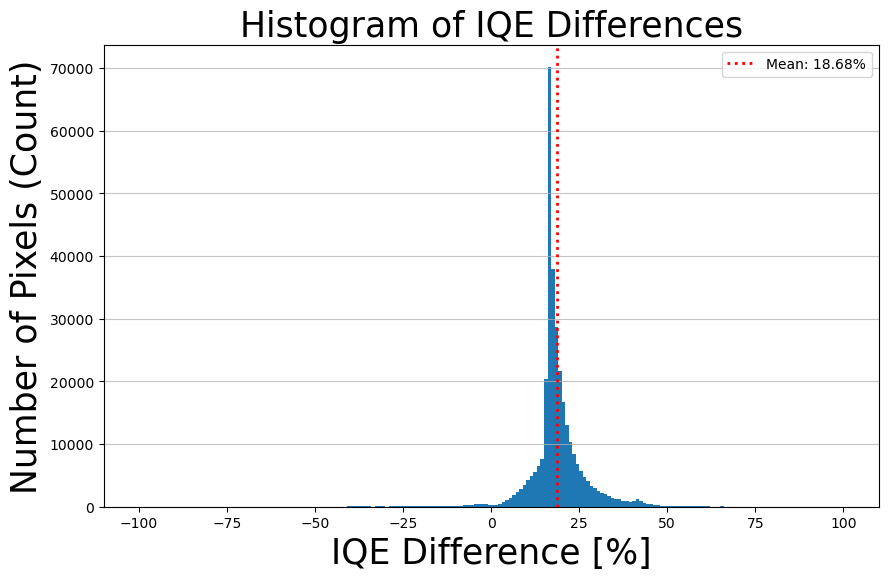

In [24]:
iqe_diff_flat = iqe_difference.flatten() * 100

# 2. Calculate the mean to display on the plot
mean_value = np.mean(iqe_diff_flat)

# 3. Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(iqe_diff_flat, bins=200, range=(-100, 100)) # Adjust bins and range as needed

# Add a vertical line to show the mean
plt.axvline(mean_value, color='red', linestyle='dotted', linewidth=2, label=f'Mean: {mean_value:.2f}%')

# Add labels and a title for clarity
plt.title('Histogram of IQE Differences',fontsize=25)
plt.xlabel('IQE Difference [%]',fontsize=25)
plt.ylabel('Number of Pixels (Count)',fontsize=25)
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()